In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Reading

In [4]:
df = pd.read_csv('../data/raw/processed.cleveland.data', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


No labels for the columns, so we name them. Refer: https://archive.ics.uci.edu/dataset/45/heart+disease

In [6]:
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd'	
]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Dealing with Missing Data

In [7]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

`ca` and `thal` have type object, it means that they have mixed types of values

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

As we can see above, in the last place there is a '?' symbol, which indicates missing value and is responsible for converting it to type *object*

In [10]:
# Number of rows that have missing values in the column of 'ca' and 'thal' 
len(df.loc[(df['ca'] == '?')
           |
           (df['thal'] == '?')])

6

In [11]:
df.loc[(df['ca'] == '?')
           |
           (df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


There are 6 rows that have one missing value, since they are so less (as compared to 302) from the whole dataset, we can simply remove them without affecting much of the actual output

In [12]:
df_with_no_missing = df.loc[(df['ca'] != '?')
                        &
                        (df['thal'] != '?')]

In [13]:
df_with_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  hd        297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


As we can see, the rows with missing values are removed (total rows are 297 now), however the columns 'ca' and 'thal' still have dtypes as *objects*

In [15]:
# Saving this Data
df_with_no_missing.to_csv("../data/processed/processed_cleveland_data.csv", index=False)

### Splitting the Data

In [13]:
# Independent Variables
X = df_with_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [14]:
y = df_with_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [26]:
numerical_cols = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak']
categorical_cols = ['restecg', 'slope', 'thal', 'ca', 'cp'] # We will pass this through OneHotEncoder

**One Hot Encoding** the categorical variables

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),                  # Keep numerical columns as is
        ('cat', OneHotEncoder(drop='first'), categorical_cols)   # One-hot encode categorical columns
    ]
)

**Changing the values of 'y'**

In [29]:
y.unique()

array([0, 2, 1, 3, 4])

Since we only want to classify, whether the person has heart disease or not, we need 2 classifications only i.e. `1 or 0`. So we will convert all the non-zero values as one, as we do need to calculate the intensity

In [30]:
y_not_zero = y > 0
y[y_not_zero] = 1
y.unique()

array([0, 1])

_Split into train and test_

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build a Preliminary Classification Tree

In [48]:
# Fit and transform the data using the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [49]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(random_state=42)

**Evaluate the model**

In [50]:
train_score = dt_model.score(X_train_transformed, y_train)
test_score = dt_model.score(X_test_transformed, y_test)

print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.72


**Plot it**

In [51]:
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

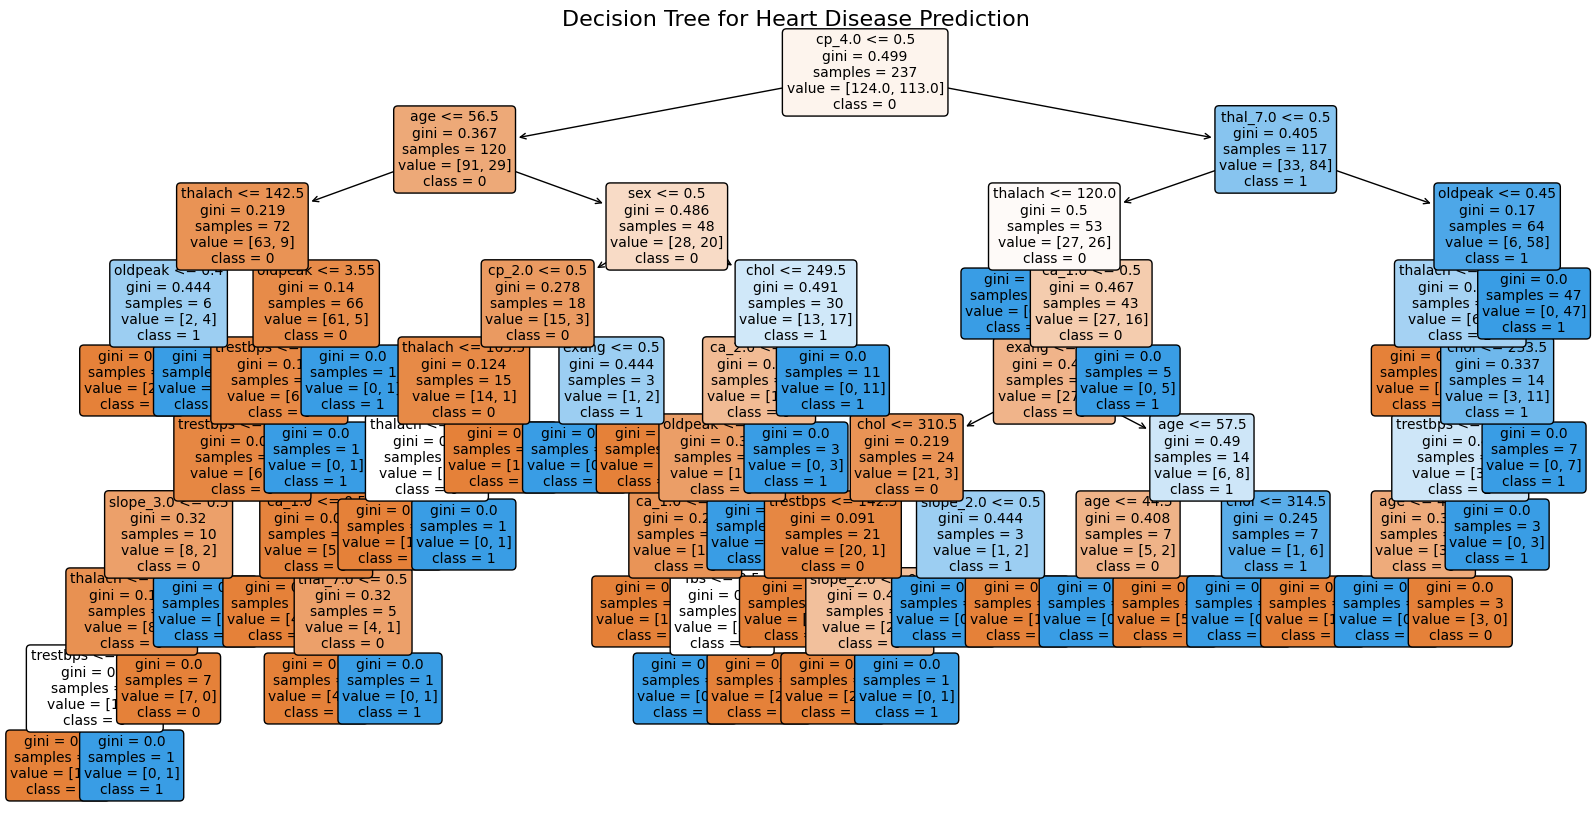

In [52]:
#  Get feature names after transformation
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Set figure size for better readability
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=[str(i) for i in sorted(y.unique())],  # Convert class labels to strings
    filled=True,  # Color nodes by class
    rounded=True,  # Rounded boxes for nodes
    fontsize=10   # Font size for readability
)
plt.title("Decision Tree for Heart Disease Prediction", fontsize=16)
plt.show()

Seeing how it actually performs on the Testing Dataset by using a **Confusion Matrix**

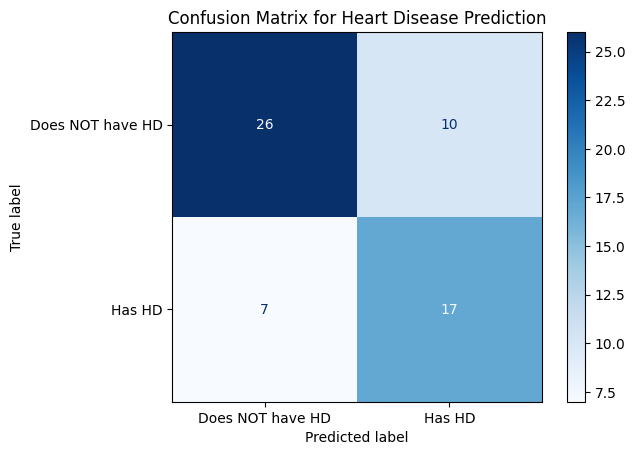

In [53]:
y_pred = dt_model.predict(X_test_transformed)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does NOT have HD", "Has HD"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Heart Disease Prediction")
plt.show()

We see that a `26 + 10 = 36` did NOT have a **heart disease**, **26 (72.2%)** were correctly classified. \
Of the `7 + 17 = 24` that did have a **heart disease**, **17 (70.8)** were correctly classified \
We might have overfit the dataset, so we will try pruning the tree itself

### Cost Complexity Pruning

We will extract the different values of `alpha` that are available for this tree and build a pruned tree for each value of `alpha`

In [54]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train) # determina Alpha values
ccp_alphas = path.ccp_alphas # extract different values of alpha
ccp_alphas = ccp_alphas[:-1] # exclude max val as it prunes everything

clf_dts = [] # list to add all the dec. trees into

# DT for each alpha added in the list
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt_model.fit(X_train, y_train)
    clf_dts.append(dt_model)

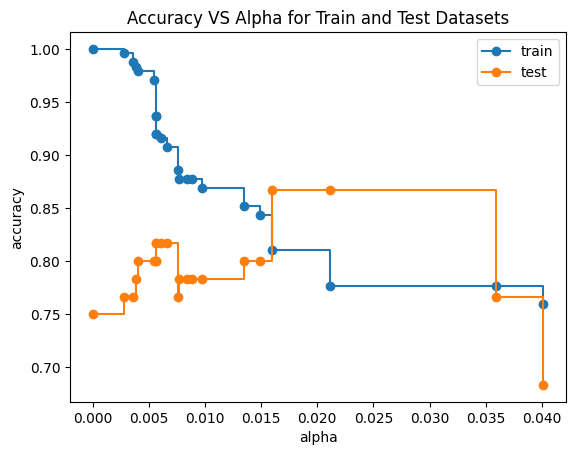

In [55]:
train_scores = [dt_model.score(X_train, y_train) for dt_model in clf_dts]
test_scores = [dt_model.score(X_test, y_test) for dt_model in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy VS Alpha for Train and Test Datasets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Accuracy of Test Data hits max at alpha $ \approx $ 0.016, so we will try to set it to that

Since, there are many ways that we could have divided the original dataset into Train and Test, there is no way to know that the current `alpha` we have is actually the best. 
So we will use **10-fold cross validation** 

### Cross Val for Finding Best Alpha

We will use different train and test datasets results in trees

<Axes: xlabel='tree'>

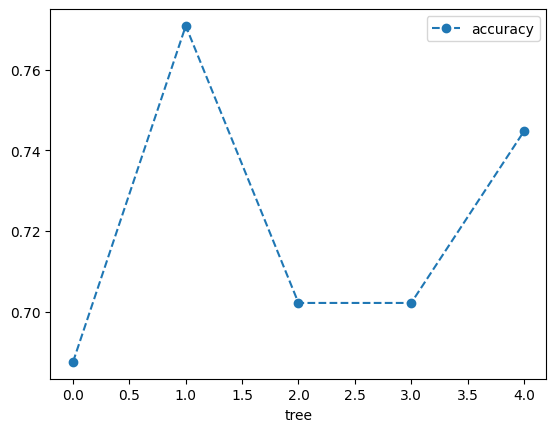

In [56]:
dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

# 5-fold cross validation
scores = cross_val_score(dt_model, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

Using different **Training** and **Testing** data with same `alpha` resulted in different inaccuracies, suggesting that the `alpha` is sensitive to the datasets. So, instead of picking a single **Training** datatset and single **Testing** dataset, lets use Cross-Val to find the optimal value for `ccp_alpha`    

<Axes: xlabel='alpha'>

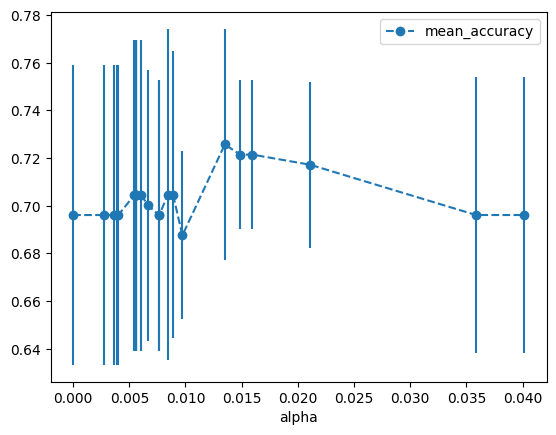

In [57]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_model, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(
                    alpha_loop_values,
                    columns=['alpha', 'mean_accuracy', 'std']
                )

alpha_results.plot(
    x='alpha',
    y='mean_accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

We can see that the value of `alpha` spikes somewhere between 0.13 and 0.15

In [58]:
alpha_results[
    (alpha_results['alpha'] > 0.013)
    &
    (alpha_results['alpha'] < 0.015)
]

,alpha,mean_accuracy,std
17,0.013502,0.725709,0.048292
18,0.014870,0.721454,0.031234


The value of `alpha` $ = $ 0.013502 is the best value and we will use it to build the tree

In [59]:
ideal_ccp_alpha = alpha_results[
    (alpha_results['alpha'] > 0.013)
    &
    (alpha_results['alpha'] < 0.014)
]
ideal_ccp_alpha

,alpha,mean_accuracy,std
17,0.013502,0.725709,0.048292


In [60]:
# Converting the Dataframe to the Float Value of Alpha that we require
ideal_ccp_alpha = float(ideal_ccp_alpha['alpha'].iloc[0])
ideal_ccp_alpha

0.013502109704641347

### Evaluating and Interpreting the Final DT

In [61]:
dt_model_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
dt_model_pruned = dt_model_pruned.fit(X_train, y_train)

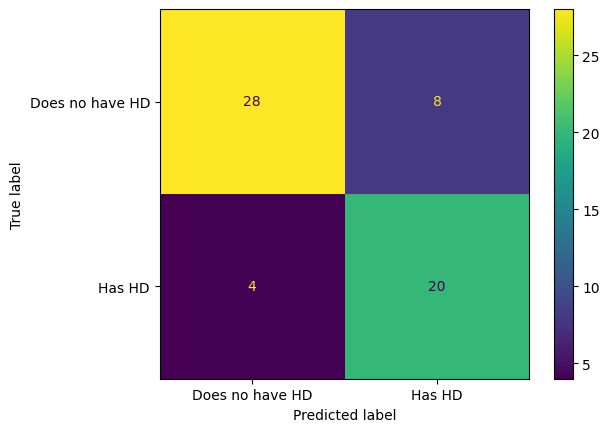

In [62]:
ConfusionMatrixDisplay.from_estimator(
    dt_model_pruned,
    X_test,
    y_test,
    display_labels = ["Does no have HD", "Has HD"]
)

We see that a `28 + 8 = 36` did NOT have a **heart disease**, **28 (77.77%)** were correctly classified. \
Of the `4 + 20 = 24` that did have a **heart disease**, **20 (83.33)** were correctly classified 


Compared to **PREVIOUSLY** \
`26 + 10 = 36` did NOT have a **heart disease**, **26 (72.2%)** were correctly classified. \
`7 + 17 = 24` that did have a **heart disease**, **17 (70.8)** were correctly classified 

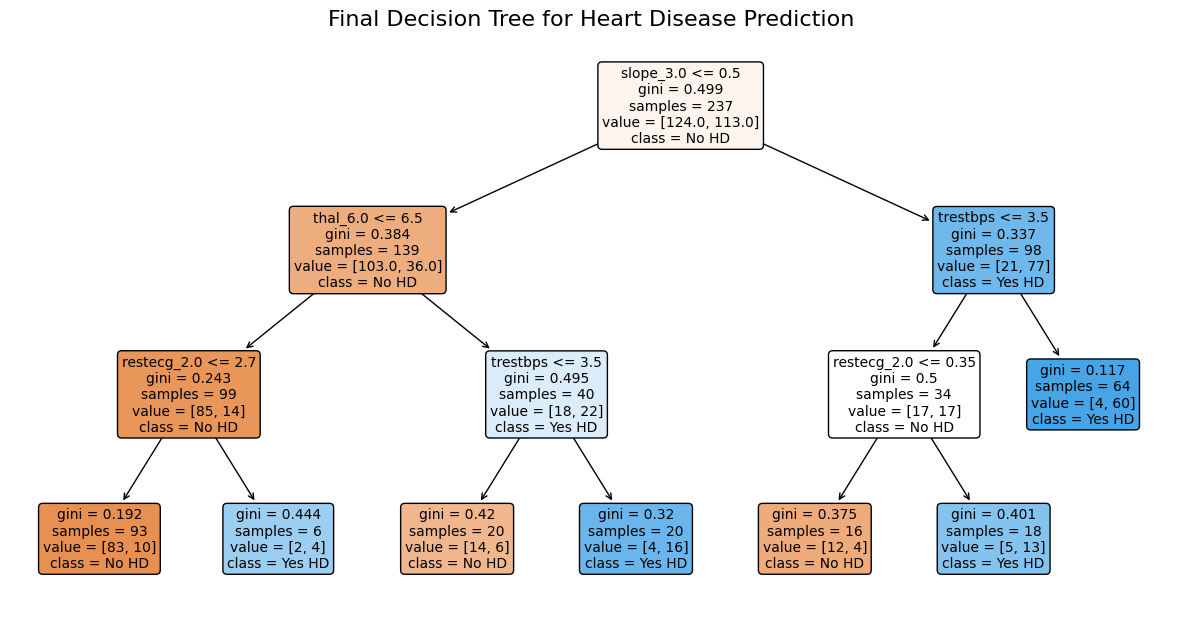

In [63]:
plt.figure(figsize=(15, 7.5))  # Set figure size for better readability
plot_tree(
    dt_model_pruned,
    feature_names=feature_names,
    class_names=["No HD", "Yes HD"],  # Convert class labels to strings
    filled=True,  # Color nodes by class
    rounded=True,  # Rounded boxes for nodes
    fontsize=10   # Font size for readability
)
plt.title("Final Decision Tree for Heart Disease Prediction", fontsize=16)
plt.show()

### MLOPs Part

In [64]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
from pathlib import Path

In [65]:
if '__file__' in globals():
    project_root = Path(__file__).resolve().parents[1]
else:
    project_root = Path(os.getcwd()).parent  # fallback for Jupyter

mlflow_db_path = project_root / "mlruns" / "mlflow.db"
mlflow.set_tracking_uri(f"sqlite:///{mlflow_db_path}")

In [66]:
print("MLflow URI:", mlflow.get_tracking_uri()) # Checking the path
print(f"sqlite:///{mlflow_db_path}")

MLflow URI: sqlite:////home/abandonedmonk/Work/MLOps-Zoomcamp-Project/mlruns/mlflow.db
sqlite:////home/abandonedmonk/Work/MLOps-Zoomcamp-Project/mlruns/mlflow.db


In [ ]:
mlflow.set_tracking_uri(mlflow.get_tracking_uri())
mlflow.set_experiment("heart-disease")

with mlflow.start_run(run_name="DecisionTree_ccp_alpha_run"):
    model = DecisionTreeClassifier(ccp_alpha=ideal_ccp_alpha, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)

    mlflow.log_param("model_name", "Decision Tree Classifier")
    mlflow.log_param("ccp_alpha", ideal_ccp_alpha)

   # Calculate and log metrics
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
        "f1_score": f1_score(y_test, y_pred, average="weighted"),
    }
    mlflow.log_metrics(metrics)

    mlflow.set_tags({
        "developer": "Anshuman Jena",        
        "problem": "Heart Disease Detection",
        "type": "classification",
        "framework": "scikit-learn",
        "version": "v1",
        "stage": "experiment"
    })

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        registered_model_name="HeartDiseaseDecisionTree",
        input_example=X_train[:5],
    )


/home/abandonedmonk/miniconda3/envs/mlops/lib/python3.12/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'HeartDiseaseDecisionTree'.
Created version '1' of model 'HeartDiseaseDecisionTree'.


#### Using other ML Algos

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [69]:
mlflow.set_tracking_uri(mlflow.get_tracking_uri())
mlflow.set_experiment("heart-disease")

with mlflow.start_run(run_name="RandomForestClassifier"):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mlflow.log_param("model_name", "Random Forest Classifier")

   # Calculate and log metrics
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
        "f1_score": f1_score(y_test, y_pred, average="weighted"),
    }
    mlflow.log_metrics(metrics)

    mlflow.set_tags({
        "developer": "Anshuman Jena",        
        "problem": "Heart Disease Detection",
        "type": "classification",
        "framework": "scikit-learn",
        "version": "v1",
        "stage": "experiment"
    })

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        registered_model_name="HeartDiseaseRandomForest",
        input_example=X_train[:5],
    )

/home/abandonedmonk/miniconda3/envs/mlops/lib/python3.12/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'HeartDiseaseRandomForest'.
Created version '1' of model 'HeartDiseaseRandomForest'.


In [72]:
mlflow.set_tracking_uri(mlflow.get_tracking_uri())
mlflow.set_experiment("heart-disease")

with mlflow.start_run(run_name="HistGradientBoostingClassifier"):
    params = {
        "learning_rate":0.1,
        "max_iter":200,
        "max_leaf_nodes":31,
        "min_samples_leaf":10,
        "l2_regularization":0.1,
        "early_stopping":True,
        "random_state":42
    }

    model = HistGradientBoostingClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mlflow.log_param("model_name", "Hist Gradient Boosting Classifier")
    mlflow.log_params(params)

   # Calculate and log metrics
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
        "f1_score": f1_score(y_test, y_pred, average="weighted"),
    }
    mlflow.log_metrics(metrics)

    mlflow.set_tags({
        "developer": "Anshuman Jena",        
        "problem": "Heart Disease Detection",
        "type": "classification",
        "framework": "scikit-learn",
        "version": "v1",
        "stage": "experiment"
    })

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        registered_model_name="HeartDiseaseHistGradientBoostingClassifier",
        input_example=X_train[:5],
    )


/home/abandonedmonk/miniconda3/envs/mlops/lib/python3.12/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'HeartDiseaseHistGradientBoostingClassifier'.
Created version '1' of model 'HeartDiseaseHistGradientBoostingClassifier'.


In [73]:
mlflow.set_tracking_uri(mlflow.get_tracking_uri())
mlflow.set_experiment("heart-disease")

with mlflow.start_run(run_name="LogisticRegression"):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mlflow.log_param("model_name", "Logistic Regression")

   # Calculate and log metrics
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
        "f1_score": f1_score(y_test, y_pred, average="weighted"),
    }
    mlflow.log_metrics(metrics)

    mlflow.set_tags({
        "developer": "Anshuman Jena",        
        "problem": "Heart Disease Detection",
        "type": "classification",
        "framework": "scikit-learn",
        "version": "v1",
        "stage": "experiment"
    })

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        registered_model_name="HeartDiseaseLogisticRegression",
        input_example=X_train[:5],
    )

/home/abandonedmonk/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abandonedmonk/miniconda3/envs/mlops/lib/python3.12/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (traini

### Inferencing the best model

In [74]:
# Loading the preprocessed data directly for inferencing
processed_df = pd.read_csv("../data/processed/processed_cleveland_data.csv")
processed_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [75]:
# Independent Variables
X = df_with_no_missing.drop('hd', axis=1).copy()
X.head()

# Dependent Variables
y = df_with_no_missing['hd'].copy()
y.head()

# Making columns for preprocessing
numerical_cols = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak']
categorical_cols = ['restecg', 'slope', 'thal', 'ca', 'cp'] # We will pass this through OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),                  # Keep numerical columns as is
        ('cat', OneHotEncoder(drop='first'), categorical_cols)   # One-hot encode categorical columns
    ]
)

# Checking only heart disease and not severity
y_not_zero = y > 0
y[y_not_zero] = 1
y.unique()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data using the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [76]:
import os
from pathlib import Path

if '__file__' in globals():
    project_root = Path(__file__).resolve().parents[1]
else:
    project_root = Path(os.getcwd()).parent  # fallback for Jupyter

mlflow_db_path = project_root / "mlruns" / "mlflow.db"
mlflow.set_tracking_uri(f"sqlite:///{mlflow_db_path}")

In [77]:
print("MLflow URI:", mlflow.get_tracking_uri()) # Checking the path
print(f"sqlite:///{mlflow_db_path}")

MLflow URI: sqlite:////home/abandonedmonk/Work/MLOps-Zoomcamp-Project/mlruns/mlflow.db
sqlite:////home/abandonedmonk/Work/MLOps-Zoomcamp-Project/mlruns/mlflow.db


In [81]:
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType
import mlflow

import pprint

mlflow.set_tracking_uri(mlflow.get_tracking_uri())
mlflow.set_experiment("heart-disease")

client = MlflowClient()

# Retrieve the top_n model runs and log the models
# experiment = client.get_experiment_by_name("heart-disease")
# runs = client.search_runs(
#         experiment_ids=experiment.experiment_id,
#         run_view_type=ViewType.ACTIVE_ONLY,
#         max_results=top_n,
#         order_by=["metrics.rmse ASC"]
#     )
# for run in runs:
#     train_and_log_model(data_path=data_path, params=run.data.params)

    # Select the model with the lowest test RMSE
experiment = client.get_experiment_by_name("heart-disease")
best_run = client.search_runs(
        experiment_ids=experiment.experiment_id,
        run_view_type=ViewType.ACTIVE_ONLY,
        max_results=1,
        order_by=["metrics.accuracy DESC"]
    )[0]

pprint.pprint(best_run)

<Run: data=<RunData: metrics={'accuracy': 0.8666666666666667,
 'f1_score': 0.8674285714285713,
 'precision': 0.8701357466063349,
 'recall': 0.8666666666666667}, params={'model_name': 'Logistic Regression'}, tags={'developer': 'Anshuman Jena',
 'framework': 'scikit-learn',
 'mlflow.log-model.history': '[{"run_id": "2a292d95206e44bda9567fe737fbc3c6", '
                             '"artifact_path": "model", "utc_time_created": '
                             '"2025-07-28 09:53:04.398812", "flavors": '
                             '{"python_function": {"model_path": "model.pkl", '
                             '"predict_fn": "predict", "loader_module": '
                             '"mlflow.sklearn", "python_version": "3.12.11", '
                             '"env": {"conda": "conda.yaml", "virtualenv": '
                             '"python_env.yaml"}}, "sklearn": '
                             '{"pickled_model": "model.pkl", '
                             '"sklearn_version": "1.4.2", '

In [ ]:
loaded_model = mlflow.sklearn.load_model(f"runs:/2a292d95206e44bda9567fe737fbc3c6/model")
loaded_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
import pickle
with open("../models/model.bin", 'wb') as f_out:
    pickle.dump(loaded_model, f_out)
print(f"Model saved to {"../models/model.bin"}")